In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("Netflix Engagement Dataset.csv")


### How does daily watch time vary across different subscription plans?

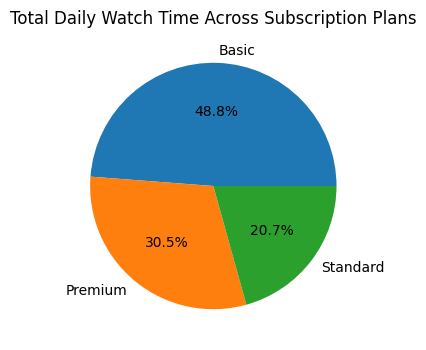

In [4]:
tot_watchTime_Premium = df[df["Subscription Plan"] == "Premium"]["Daily Watch Time (Hours)"].sum()
tot_watchTime_Standard = df[df["Subscription Plan"] == "Standard"]["Daily Watch Time (Hours)"].sum()
tot_watchTime_Basic = df[df["Subscription Plan"] == "Basic"]["Daily Watch Time (Hours)"].sum()
tot_watchtime = np.array([tot_watchTime_Basic,tot_watchTime_Standard,tot_watchTime_Premium])
types_subs = np.sort(df["Subscription Plan"].unique())


plt.figure(figsize=[8,4])
plt.pie(tot_watchtime,labels=types_subs,autopct="%1.1f%%")
plt.title("Total Daily Watch Time Across Subscription Plans")
plt.show()

### What is the churn rate across different regions?

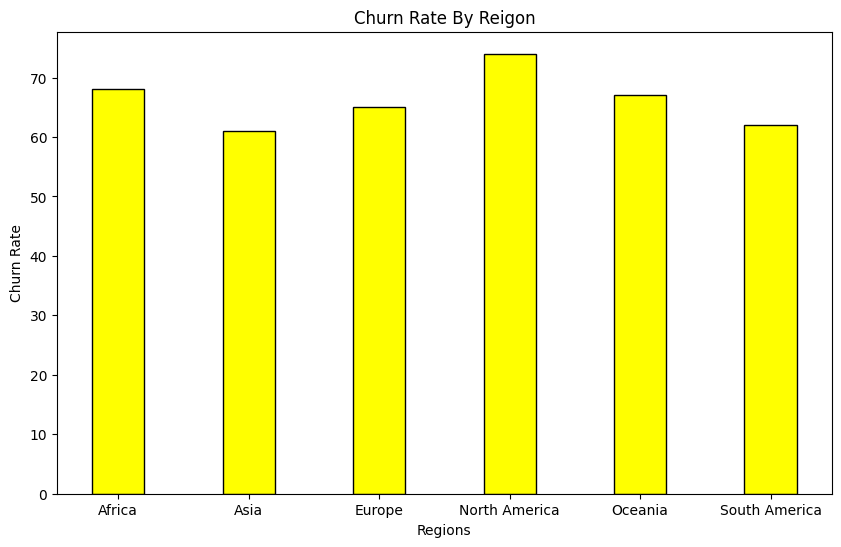

In [7]:
churn_rate = df.groupby("Region")["Churn Status (Yes/No)"].value_counts().unstack()["Yes"].values
plt.figure(figsize=[10,6])
plt.bar(regions,churn_rate,0.4,color='yellow',edgecolor = 'black')
plt.xlabel("Regions")
plt.ylabel("Churn Rate")
plt.title("Churn Rate By Reigon")
plt.show()


### Number of People Having Which Subscription in Each Reigon?

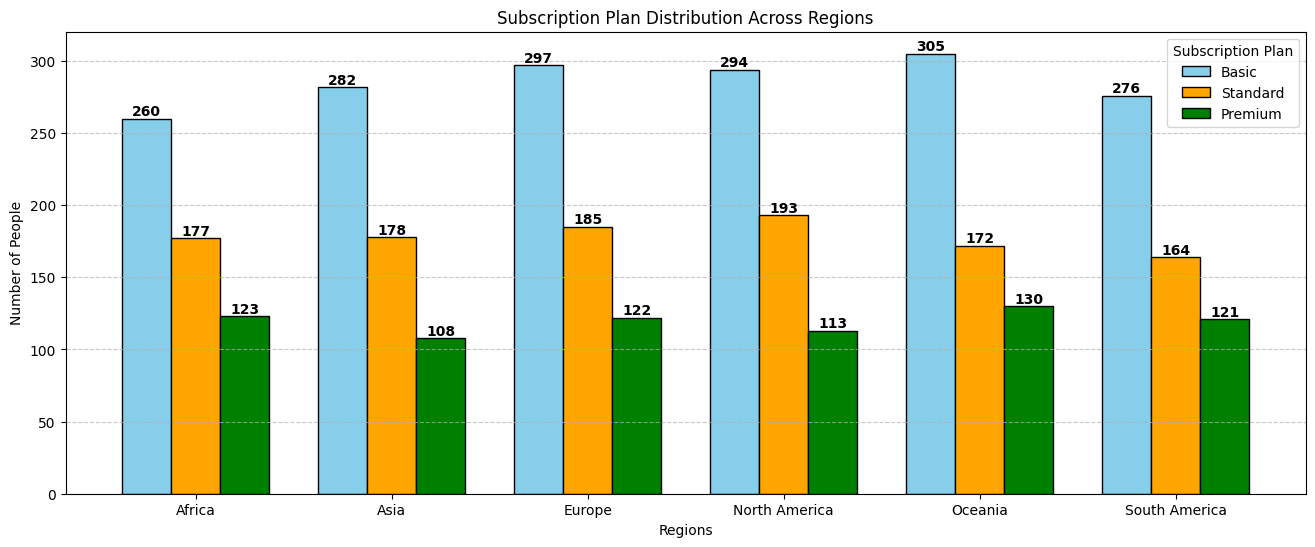

In [99]:
hey = df.groupby(["Region", "Subscription Plan"]).size().unstack()

plt.figure(figsize=[16,6])
barwidth = 0.25
x = np.arange(len(regions))

bar1=plt.bar(x - barwidth, hey["Basic"], width=barwidth, label="Basic", color="skyblue", edgecolor="black",)
bar2=plt.bar(x, hey["Standard"], width=barwidth, label="Standard", color="orange", edgecolor="black")
bar3=plt.bar(x + barwidth, hey["Premium"], width=barwidth, label="Premium", color="green", edgecolor="black")

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, height, f'{height:.0f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Add labels to each bar
add_labels(bar1)
add_labels(bar2)
add_labels(bar3)


plt.xlabel("Regions")
plt.ylabel("Number of People")
plt.title("Subscription Plan Distribution Across Regions")
plt.xticks(x, regions)
plt.legend(title="Subscription Plan")  

plt.grid(axis="y", linestyle="--", alpha=0.7)

### What is the age distribution of Netflix users?

[26 27 55 ... 50 30 45]


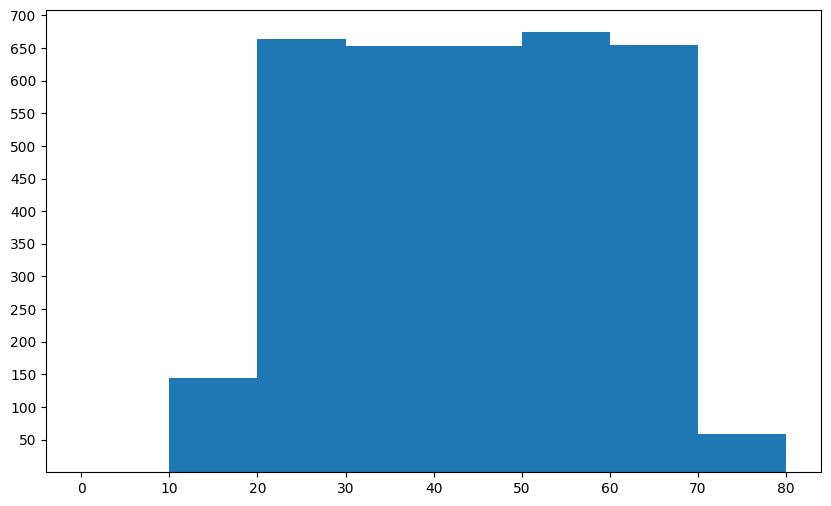

In [108]:
age = df["Age"].values
print(age)
plt.figure(figsize=[10,6])
plt.hist(age,bins=[0,10,20,30,40,50,60,70,80])
plt.yticks(np.array([50,100,150,200,250,300,350,400,450,500,550,600,650,700]))
plt.show()

### how many people watch netflix from which device in a specific reigon

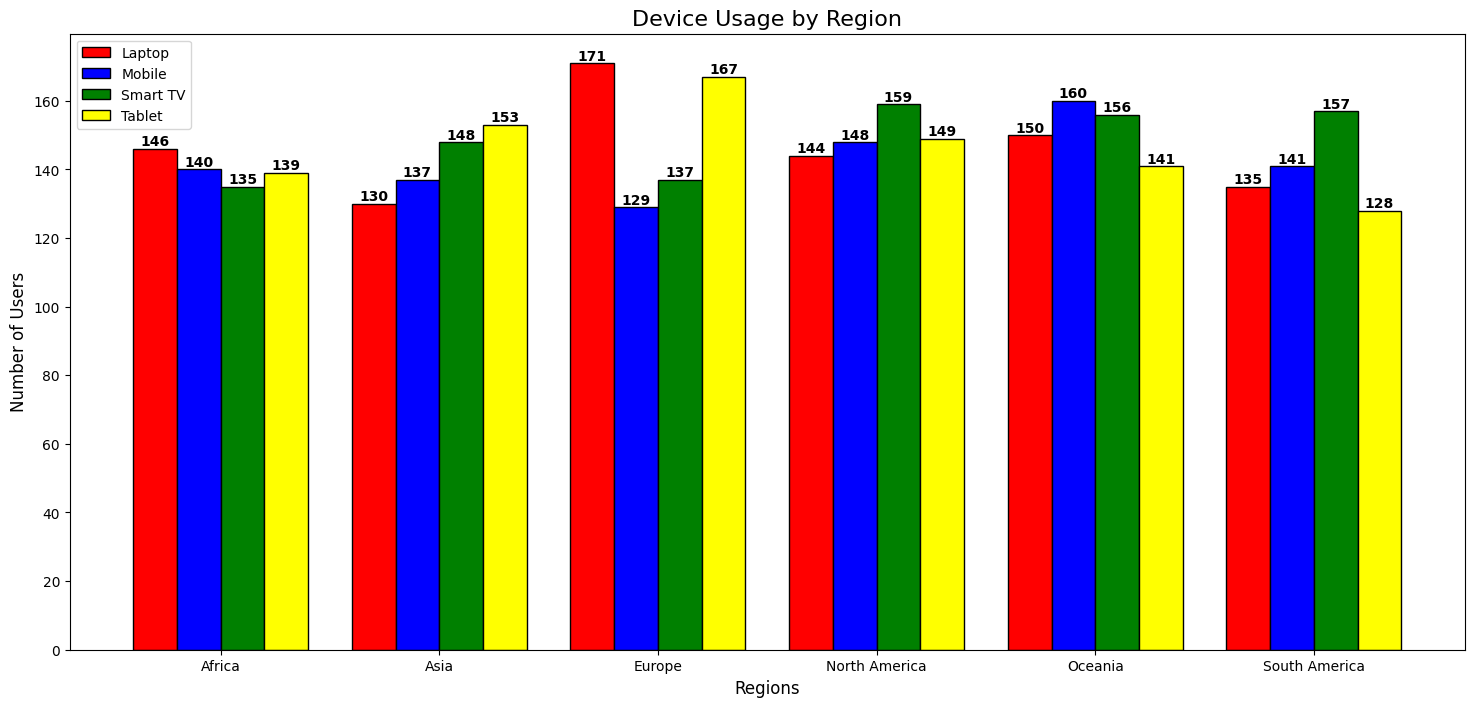

In [151]:
count = df.groupby(["Region","Device Used Most Often"]).size().unstack()
plt.figure(figsize=[18,8])
x = np.arange(len(regions))
width = 0.2
bar1 = plt.bar(x-width,count["Laptop"],width,color="red",edgecolor="black",label="Laptop")
bar2 = plt.bar(x,count["Mobile"],width,color="blue",edgecolor="black",label="Mobile")
bar3 = plt.bar(x+width,count["Smart TV"],width,color="green",edgecolor="black",label="Smart TV")
bar4 = plt.bar(x+width*2,count["Tablet"],width,color="yellow",edgecolor="black",label="Tablet")

add_labels(bar1)
add_labels(bar2)
add_labels(bar3)
add_labels(bar4)
plt.legend()
plt.xticks(x+0.1,regions)
plt.xlabel("Regions",fontsize=12)
plt.ylabel("Number of Users",fontsize=12)
plt.title("Device Usage by Region",fontsize=16)
plt.show()

### What are the top 5 most preferred genres?

[697 733 685 681 704]


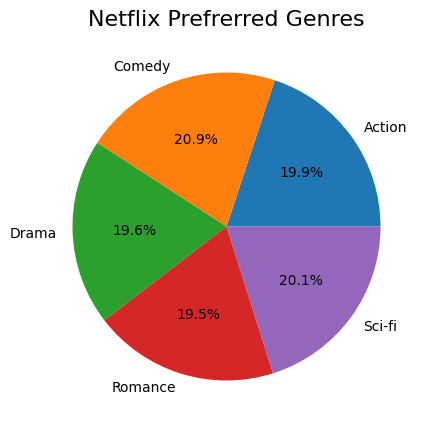

In [178]:
preference_count = df.groupby("Genre Preference").size()
print(preference_count.values)
plt.figure(figsize=[10,5])
plt.pie(preference_count.values,labels=preference_count.index,autopct="%1.1f%%")
plt.title("Netflix Prefrerred Genres",fontsize=16)
plt.show()

### Engagement Rate and Promotional Offers Used

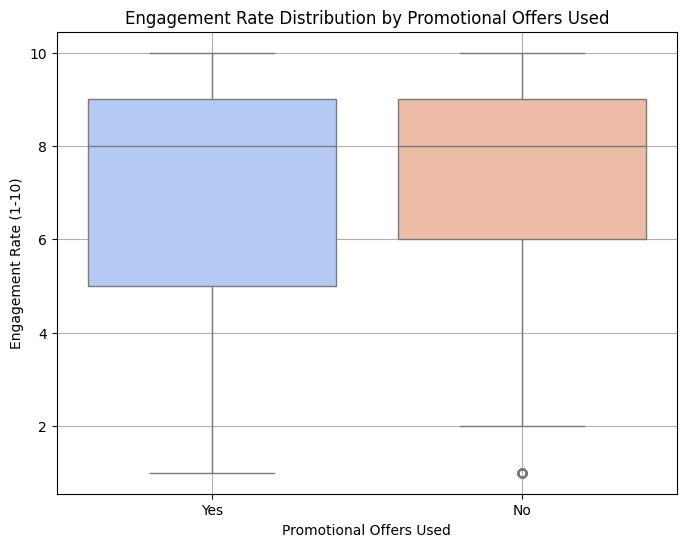

In [ ]:
plt.figure(figsize=[8,6])
sns.boxplot(x=df["Promotional Offers Used"], 
            y=df["Engagement Rate (1-10)"], 
            hue=df["Promotional Offers Used"], 
            palette="coolwarm", 
            legend=False)  

plt.xlabel("Promotional Offers Used")
plt.ylabel("Engagement Rate (1-10)")
plt.title("Engagement Rate Distribution by Promotional Offers Used")

plt.grid(True)
plt.show()